<h1>Network of related subreddits where active authors also posted (Covid19 Lockdown)</h1>

Objective: 
- Find out which author on Reddit has been actively posting about the topic of Covid19 Lockdown, the most popular submission (post) revolving around that topic and related subreddits which the group of active users are also talking about at the same time

Findings:
- Most Active user in Coronavrius Anti Lockdown Subreddit: BurnerAcc2020 
- Most popular submission (post): Ending coronavirus lockdowns will be a dangerous process of trial and error
- Most commonly posted topic among the group of active users: Covid19, Coronavirus, nottheonion

In [1]:
# https://praw.readthedocs.io/en/latest/code_overview/models/submission.html
# https://www.reddit.com/r/redditdev/comments/rhrz9f/404_response_using_literally_the_code_in_the_docs/

In [2]:
# pip install praw

In [3]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
# Set up Connection with Reddit

reddit = praw.Reddit(client_id='RyUj7x3RzmFJXAoPLzYCYw', \
                     client_secret='KbKj5ps21RQ_hZPJF1l7p1FGEDsyRA', \
                     user_agent='IS434_JoeyLau', \
                     username='joeylau2000', \
                     password='')

In [5]:
# Read CSV File in Data Frame

lockdown_data = pd.read_csv('../Reddit_Data/Reddit_COVID19_Lockdown_100.csv')

In [6]:
# Sort Data Frame based on highest score

lockdown_data_by_score = lockdown_data.sort_values("score", ascending=False)

In [7]:
# Preview Data Frame

lockdown_data_by_score

,author,title,score,id,url,comms_num,created,body,timestamp
17,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,g1hpwu,https://www.sciencemag.org/news/2020/04/ending...,1484,1.586912e+09,NaN,2020-04-15 08:46:34
89,edmar10,Successful Elimination of Covid-19 Transmissio...,1446,i5hd6e,https://www.nejm.org/doi/full/10.1056/NEJMc202...,130,1.596819e+09,NaN,2020-08-08 00:51:33
25,p44v9n,Uni of Ox study shows that a mobile app for di...,1290,fkuiz9,https://045.medsci.ox.ac.uk/mobile-app,194,1.584556e+09,NaN,2020-03-19 02:32:53
92,polabud,Second wave of the ENE-COVID-19 study: immunit...,932,gwkkb1,https://www.isciii.es/Noticias/Noticias/Pagina...,186,1.591287e+09,NaN,2020-06-05 00:18:02
21,frequenttimetraveler,Strict Physical Distancing May Be More Efficie...,909,gr29as,https://www.medrxiv.org/content/10.1101/2020.0...,352,1.590517e+09,NaN,2020-05-27 02:10:44
...,...,...,...,...,...,...,...,...,...
3,BurnerAcc2020,The effect of COVID-19 pandemic and lockdown o...,4,zu8efy,https://bmcprimcare.biomedcentral.com/articles...,1,1.671883e+09,NaN,2022-12-24 19:55:49
48,Peeecee7896,"Interplay between mobility, multi-seeding and ...",2,qb3esu,https://journals.plos.org/ploscompbiol/article...,2,1.634616e+09,NaN,2021-10-19 11:57:49
69,frobar,COVID-19 and Subjective Well-Being - Separatin...,2,jo7ej6,https://www.bennettinstitute.cam.ac.uk/media/u...,12,1.604532e+09,NaN,2020-11-05 07:21:43
1,BurnerAcc2020,Impact of COVID-19 lockdown on smoking and vap...,2,11g1u29,https://www.sciencedirect.com/science/article/...,1,1.677761e+09,NaN,2023-03-02 20:42:35


In [8]:
# Get title of submission (post) with highest score - the number of upvotes a comment receives

lockdown_data_by_score.loc[17]['title']

'Ending coronavirus lockdowns will be a dangerous process of trial and error'

In [9]:
# Find unique authors (out of 100)

lockdown_data_by_score.author.nunique() 

57

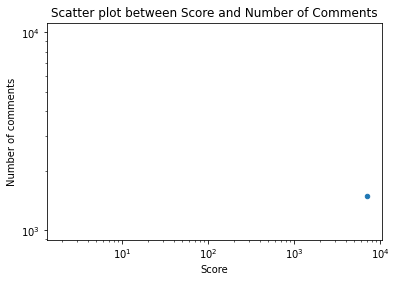

In [10]:
# Relationship between comments and upvotes 

ax = lockdown_data_by_score.plot('score', 'comms_num', kind='scatter', logx=True, logy=True, title='Scatter plot between Score and Number of Comments')
ax.set(xlabel="Score", ylabel="Number of comments")
plt.savefig("../Reddit_Output/ScatterPlot_COVID19_Lockdown", dpi=150, bbox_inches='tight', pad_inches=0.5)

In [11]:
# Only take users who posted more than once

repeating = lockdown_data_by_score[lockdown_data_by_score.duplicated(['author'], keep=False)] 

In [12]:
repeating

,author,title,score,id,url,comms_num,created,body,timestamp
89,edmar10,Successful Elimination of Covid-19 Transmissio...,1446,i5hd6e,https://www.nejm.org/doi/full/10.1056/NEJMc202...,130,1.596819e+09,NaN,2020-08-08 00:51:33
92,polabud,Second wave of the ENE-COVID-19 study: immunit...,932,gwkkb1,https://www.isciii.es/Noticias/Noticias/Pagina...,186,1.591287e+09,NaN,2020-06-05 00:18:02
23,edmar10,Lockdown-type measures look effective against ...,717,hs163d,https://www.bmj.com/content/370/bmj.m2809,176,1.594865e+09,NaN,2020-07-16 10:08:18
50,zeaqqk,"In the Midst of a Pandemic, Introverts May Hav...",589,uzdkg1,https://www.medrxiv.org/content/10.1101/2022.0...,39,1.653704e+09,NaN,2022-05-28 10:14:14
91,civicode,Estimated transmissibility and severity of nov...,314,kj10oz,https://cmmid.github.io/topics/covid19/uk-nove...,86,1.608757e+09,NaN,2020-12-24 04:50:14
43,KuduIO,"Behavioral changes before lockdown, and decrea...",308,hfo9dg,https://www.medrxiv.org/content/10.1101/2020.0...,15,1.593100e+09,NaN,2020-06-25 23:39:36
94,icloudbug,The course of the UK COVID 19 pandemic; no mea...,286,m6z1g6,https://www.medrxiv.org/content/10.1101/2021.0...,35,1.615983e+09,NaN,2021-03-17 20:13:26
95,civicode,Rapid increase of a SARS-CoV-2 variant with mu...,276,khjblw,https://www.ecdc.europa.eu/sites/default/files...,60,1.608564e+09,NaN,2020-12-21 23:17:46
14,Peeecee7896,Happier during lockdown: a descriptive analysi...,264,sz237u,https://link.springer.com/article/10.1007/s007...,18,1.645573e+09,NaN,2022-02-23 07:41:19
37,smaskens,The impact of lockdown during the COVID-19 pan...,189,jnyiaf,https://www.medrxiv.org/content/10.1101/2020.1...,23,1.604503e+09,NaN,2020-11-04 23:20:06


In [13]:
len(repeating)

54

In [14]:
# Remove deleted users

repeating = repeating[repeating.author != 'None'] 
repeating.author.value_counts()

BurnerAcc2020    15
smaskens          8
KuduIO            6
Peeecee7896       6
icloudbug         4
goodoneforyou     4
polabud           3
zeaqqk            2
burtzev           2
civicode          2
edmar10           2
Name: author, dtype: int64

In [15]:
# Out of 100 posts, this is the amount of people who posted more than once 

repeating.author.nunique() 

11

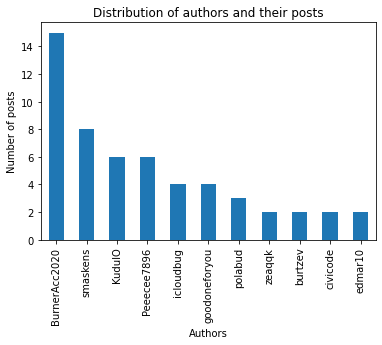

In [16]:
# See the distrubution of authors and their posts

ax = repeating.author.value_counts().plot(kind='bar',title='Distribution of authors and their posts') 
ax.set(xlabel="Authors", ylabel="Number of posts")
plt.savefig("../Reddit_Output/BargraphAuthors_COVID19_Lockdown",dpi=150, bbox_inches='tight',pad_inches=0.5)

In [17]:
# Compiling a list of authors that appeared more than once on subreddit's top of all times 
# (Used for network graph and for get_user_posts function)

u_authors = list(repeating.author.unique()) 

In [18]:
def get_user_posts(author, n):
    
    redditor = reddit.redditor(author)
    user_posts_list = []
    
    for submission in redditor.submissions.top(limit = n):
        info_list = []
        info_list.append(submission.id)
        info_list.append(submission.score)
        info_list.append(str(submission.author))
        info_list.append(submission.num_comments)
        info_list.append(str(submission.subreddit))
        user_posts_list.append(info_list)
    
    a = sorted(user_posts_list, key=lambda x: x[1], reverse = True)
    user_posts_df = pd.DataFrame(a)
    return user_posts_df 

In [19]:
authors_df =  pd.DataFrame() 
authors_df = authors_df.fillna(0)
for u in u_authors: # Loops through every "influencer" user and gets 10 top posts per user
    c = get_user_posts(u, 10)
    authors_df = pd.concat([authors_df, c]) 

In [20]:
authors_df = authors_df.rename(index=str, # rename column names 
                               columns={0: "id", 1: "score", 2: "author", 3: "num_comments", 4: "subreddit"})

In [21]:
# Dataframe of other subreddits where authors posted 

authors_df.head(10) 

,id,score,author,num_comments,subreddit
0,hwh4sg,2463,edmar10,178,COVID19
1,9mudcg,2425,edmar10,75,TrumpCriticizesTrump
2,i5hd6e,1448,edmar10,130,COVID19
3,hldww4,931,edmar10,247,Coronavirus
4,k46qme,877,edmar10,80,Coronavirus
5,jijujn,804,edmar10,90,COVID19
6,hs163d,710,edmar10,176,COVID19
7,qhwv4,687,edmar10,104,soccer
8,v7ocva,582,edmar10,36,COVID19
9,kfekny,540,edmar10,83,COVID19


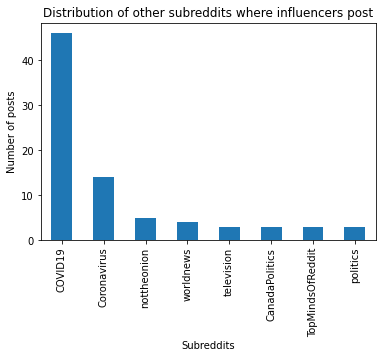

In [22]:
counts = authors_df['subreddit'].value_counts() 
# Only plot the subreddits that appear more than twice
ax = authors_df[authors_df['subreddit'].isin(counts[counts > 2].index)].subreddit.value_counts().plot(kind='bar',title='Distribution of other subreddits where influencers post') 
ax.set(xlabel="Subreddits", ylabel="Number of posts")
plt.savefig("../Reddit_Output/BargraphSubreddits_COVID19_Lockdown",dpi=150, bbox_inches='tight',pad_inches=0.5)

In [23]:
# Create a dataframe for network graph 

n_df = authors_df[['author', 'subreddit']] 
n_df.head()

,author,subreddit
0,edmar10,COVID19
1,edmar10,TrumpCriticizesTrump
2,edmar10,COVID19
3,edmar10,Coronavirus
4,edmar10,Coronavirus


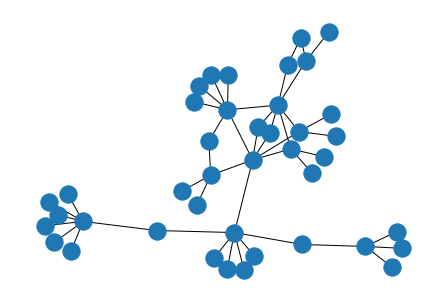

In [24]:
# Not a very meaningful graph

g = nx.from_pandas_edgelist(n_df, source='author', target='subreddit') 
nx.draw(g)

In [25]:
# Make list of unique subreddits to use in network graph 

subs = list(n_df.subreddit.unique()) 

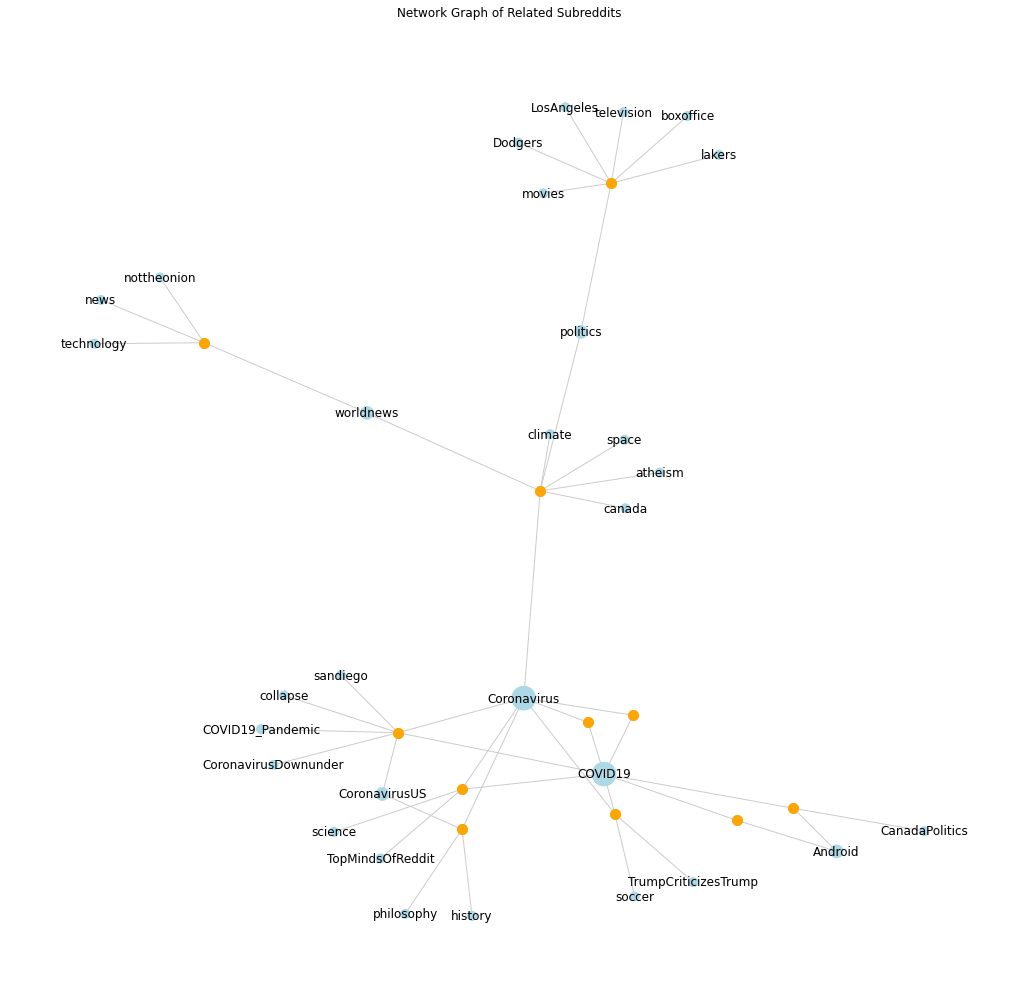

In [26]:
plt.figure(figsize=(18, 18))

# Create the graph from the dataframe
g = nx.from_pandas_edgelist(n_df, source='author', target='subreddit') 

# Create a layout for nodes 
layout = nx.spring_layout(g,iterations=50,scale=2)

# Draw the parts we want, edges thin and grey
# Influencers appear small and grey
# Subreddits appear in blue and sized according to their respective number of connections.
# Labels for subreddits ONLY
# People who have more connections are highlighted in color 

# Go through every subbreddit, ask the graph how many connections it has. 
# Multiply that by 80 to get the circle size
sub_size = [g.degree(sub) * 80 for sub in subs]
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=subs, 
                       node_size=sub_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# Draw all the entities 
nx.draw_networkx_nodes(g, layout, nodelist=u_authors, node_color='#cccccc', node_size=100)

# Draw highly connected influencers 
popular_people = [person for person in u_authors if g.degree(person) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_people, node_color='orange', node_size=100)

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(subs, subs)) #labels for subs
nx.draw_networkx_labels(g, layout, labels=node_labels)

# No axis needed
plt.axis('off')
plt.title("Network Graph of Related Subreddits")
plt.savefig("../Reddit_Output/NetworkGraph_COVID19_Lockdown", bbox_inches='tight',pad_inches=0.5)
plt.show()